## Image Interpolation

In [1]:
import cv2
import os
import numpy as np

# Paths
input_folder = "stage1"
output_folder = "stage1-interpolated"
os.makedirs(output_folder, exist_ok=True)

def interpolate_frames(frame1, frame2, num_interpolations=1):
    """
    Interpolates between two frames using linear interpolation.
    
    Args:
        frame1 (numpy.ndarray): First frame.
        frame2 (numpy.ndarray): Second frame.
        num_interpolations (int): Number of interpolated frames to generate.
    
    Returns:
        list: List of interpolated frames.
    """
    interpolated_frames = []
    for i in range(1, num_interpolations + 1):
        alpha = i / (num_interpolations + 1)  # Interpolation ratio
        interpolated_frame = cv2.addWeighted(frame1, 1 - alpha, frame2, alpha, 0)
        interpolated_frames.append(interpolated_frame)
    return interpolated_frames

def process_video(video_path, output_path, num_interpolations=1):
    """
    Processes a video to add interpolated frames and saves the result.
    
    Args:
        video_path (str): Path to the input video.
        output_path (str): Path to save the interpolated video.
        num_interpolations (int): Number of interpolated frames between each pair of original frames.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Failed to open video: {video_path}")
        return
    
    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files
    
    # New FPS after interpolation
    new_fps = fps * (num_interpolations + 1)
    out = cv2.VideoWriter(output_path, fourcc, new_fps, (width, height))
    
    ret, prev_frame = cap.read()
    while ret:
        ret, next_frame = cap.read()
        if not ret:
            break

        # Write the original frame
        out.write(prev_frame)

        # Generate and write interpolated frames
        interpolated_frames = interpolate_frames(prev_frame, next_frame, num_interpolations)
        for frame in interpolated_frames:
            out.write(frame)
        
        # Update the previous frame
        prev_frame = next_frame

    # Release resources
    cap.release()
    out.release()
    print(f"Interpolated video saved to: {output_path}")

# Process all videos in the input folder
num_interpolations = 3  # Number of interpolated frames between each pair
for video_file in os.listdir(input_folder):
    if video_file.endswith(".mp4"):
        input_path = os.path.join(input_folder, video_file)
        output_path = os.path.join(output_folder, video_file)
        process_video(input_path, output_path, num_interpolations=num_interpolations)

print("Interpolation complete for all videos.")


Interpolated video saved to: stage1-interpolated\user1.mp4
Interpolated video saved to: stage1-interpolated\user12.mp4
Interpolated video saved to: stage1-interpolated\user13.mp4
Interpolated video saved to: stage1-interpolated\user19.mp4
Interpolated video saved to: stage1-interpolated\user2.mp4
Interpolated video saved to: stage1-interpolated\user22.mp4
Interpolated video saved to: stage1-interpolated\user23.mp4
Interpolated video saved to: stage1-interpolated\user3.mp4
Interpolated video saved to: stage1-interpolated\user5.mp4
Interpolated video saved to: stage1-interpolated\user8.mp4
Interpolation complete for all videos.


## Frames count

In [2]:
import cv2
import os

# Path to the folder containing the videos
stage_path = "stage1-interpolated"

# List to store the number of frames for each video
frame_counts = []

# Iterate through the videos in the folder
for file in os.listdir(stage_path):
    if file.endswith(".mp4"):
        video_file_path = os.path.join(stage_path, file)
        
        # Open the video file
        cap = cv2.VideoCapture(video_file_path)
        
        if not cap.isOpened():
            print(f"Error opening video file: {file}")
            continue

        # Get the total number of frames
        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_counts.append(total_frames)

        cap.release()

# Calculate average, minimum, and maximum frame counts
if frame_counts:
    avg_frames = sum(frame_counts) / len(frame_counts)
    min_frames = min(frame_counts)
    max_frames = max(frame_counts)

    print(f"Average frames per video: {avg_frames:.2f}")
    print(f"Minimum frames in a video: {min_frames}")
    print(f"Maximum frames in a video: {max_frames}")
else:
    print("No valid videos found in the specified folder.")


Average frames per video: 248.80
Minimum frames in a video: 84
Maximum frames in a video: 480


## Standardize videos

In [3]:
import cv2
import os

# Path to input and output directories
input_dir = "stage1-interpolated"
output_dir = "stage1-250frames"
os.makedirs(output_dir, exist_ok=True)

target_frames = 250  # Target number of frames per video

def truncate_or_pad_video(video_path, output_path, target_frames):
    """
    Truncate or pad a video to ensure it has exactly `target_frames` frames.

    Args:
        video_path (str): Path to the input video.
        output_path (str): Path to save the processed video.
        target_frames (int): Desired number of frames.
    """
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))

    # Create VideoWriter for the output video
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)
    cap.release()

    if len(frames) < target_frames:
        # Pad by duplicating frames
        while len(frames) < target_frames:
            frames.append(frames[-1])  # Duplicate the last frame
    elif len(frames) > target_frames:
        # Truncate to the first 130 frames
        frames = frames[:target_frames]

    # Write the processed frames to the output video
    for frame in frames:
        out.write(frame)
    out.release()

# Process all videos in the input directory
for file in os.listdir(input_dir):
    if file.endswith(".mp4"):
        input_path = os.path.join(input_dir, file)
        output_path = os.path.join(output_dir, file)
        truncate_or_pad_video(input_path, output_path, target_frames)

print("All videos resized to exactly 130 frames using truncate or pad method.")


All videos resized to exactly 130 frames using truncate or pad method.


## Augmentation

In [4]:
import cv2
import os
import pandas as pd
import numpy as np

# Paths
input_folder = "stage1-250frames"
output_folder = "stage1-dataset"
os.makedirs(output_folder, exist_ok=True)

# Load labels
labels_df = pd.read_csv("stage1.csv")

# Augmentation Functions
def augment_video(video_path, output_path, augmentation_type, is_odd):
    """
    Augment the video with the specified augmentation type and save it.
    
    Args:
        video_path (str): Path to the input video.
        output_path (str): Path to save the augmented video.
        augmentation_type (str): Type of augmentation ('rotate', 'brightness', 'noise', etc.).
        is_odd (bool): Whether the video index is odd or even.
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Error: Unable to open video file {video_path}")
        return

    # Get video properties
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for .mp4 files

    # Create VideoWriter object
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Apply augmentation
        if augmentation_type == "mirrored":
            frame = cv2.flip(frame, 1)  # Horizontal flip
        elif augmentation_type == "rotate":
            angle = 3 if is_odd else -3  # Adjusted rotation angles
            M = cv2.getRotationMatrix2D((width // 2, height // 2), angle, 1)
            frame = cv2.warpAffine(frame, M, (width, height))
        elif augmentation_type == "brightness":
            alpha = 1.05 if is_odd else 0.95  # Adjusted brightness
            frame = cv2.convertScaleAbs(frame, alpha=alpha, beta=0)
        elif augmentation_type == "noise":
            noise = np.random.normal(0, 0.05, frame.shape).astype(np.uint8)  # Add small random noise
            frame = cv2.add(frame, noise)

        # Write the augmented frame
        out.write(frame)

    cap.release()
    out.release()

# Augment videos and create a new CSV file
augmented_data = []
for idx, row in labels_df.iterrows():
    video_path = row['video']
    label = row['label']
    base_name = os.path.splitext(os.path.basename(video_path))[0]

    # Original video path
    input_video_path = os.path.join(input_folder, os.path.basename(video_path))
    is_odd = (idx % 2 == 1)

    # Add original video to the dataset
    original_video_path = os.path.join(output_folder, f"{base_name}_original.mp4")
    if not os.path.exists(original_video_path):
        cap = cv2.VideoCapture(input_video_path)
        if cap.isOpened():
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = int(cap.get(cv2.CAP_PROP_FPS))
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            out = cv2.VideoWriter(original_video_path, fourcc, fps, (width, height))
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break
                out.write(frame)
            cap.release()
            out.release()
    augmented_data.append({
        "video": original_video_path,
        "label": label
    })

    # Apply augmentations
    for aug_type in ["mirrored", "rotate", "brightness", "noise"]:
        output_video_name = f"{base_name}_{aug_type}.mp4"
        output_video_path = os.path.join(output_folder, output_video_name)
        augment_video(input_video_path, output_video_path, aug_type, is_odd)

        # Append to dataset
        augmented_data.append({
            "video": output_video_path,
            "label": label
        })

# Create a new DataFrame for augmented dataset
augmented_df = pd.DataFrame(augmented_data)

# Save the new dataset labels to a CSV file
augmented_df.to_csv("stage1-dataset.csv", index=False)
print("Augmented videos saved to stage1-dataset and labels saved to stage1-dataset.csv.")


Augmented videos saved to stage1-dataset and labels saved to stage1-dataset.csv.


## Keypoints extraction

In [8]:
import os
import cv2
import mediapipe as mp
import numpy as np
import json

# Ensure output directory exists
output_video_path = "stage1-test/user1.mp4"
output_dir = os.path.dirname(output_video_path)
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

def calculate_angle(a, b, c):
    """Calculate the angle formed by three points a, b, c (b is the vertex)."""
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

def extract_and_visualize_features(video_path, output_video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Error: Unable to open video file")
        return
    
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    
    if fps == 0:
        fps = 30  # Set a default FPS value

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    if not out.isOpened():
        print("Error: VideoWriter not opened properly")
        return

    keypoints_list = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        results = pose.process(frame_rgb)
        
        if results.pose_landmarks:
            landmarks = results.pose_landmarks.landmark
            
            # Extract relevant keypoints
            nose = [landmarks[mp_pose.PoseLandmark.NOSE].x * frame_width, landmarks[mp_pose.PoseLandmark.NOSE].y * frame_height]
            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x * frame_width, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y * frame_height]
            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * frame_width, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * frame_height]
            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x * frame_width, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y * frame_height]
            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x * frame_width, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y * frame_height]

            # Calculate angles
            head_angle = calculate_angle(left_shoulder, nose, right_shoulder)
            hip_movement = right_hip[0] - left_hip[0]  # Track x movement
            
            keypoints_list.append({
                "head_angle": head_angle,
                "hip_movement": hip_movement,
                "nose_x": nose[0] / frame_width,
                "nose_y": nose[1] / frame_height,
            })

            # Draw keypoints and bounding box
            cv2.circle(frame, tuple(map(int, nose)), 8, (0, 255, 0), -1)  # Nose keypoint
            cv2.circle(frame, tuple(map(int, left_shoulder)), 8, (0, 0, 255), -1)  # Left shoulder
            cv2.circle(frame, tuple(map(int, right_shoulder)), 8, (0, 0, 255), -1)  # Right shoulder
            
            x_min = int(min(left_shoulder[0], right_shoulder[0], left_hip[0], right_hip[0])) - 20
            y_min = int(min(left_shoulder[1], right_shoulder[1])) - 20
            x_max = int(max(left_shoulder[0], right_shoulder[0], left_hip[0], right_hip[0])) + 20
            y_max = int(max(left_hip[1], right_hip[1])) + 20

            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (255, 255, 0), 2)
            cv2.putText(frame, f"Head Angle: {int(head_angle)}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.8, (0, 255, 0), 2)
            cv2.putText(frame, f"Hip Movement: {int(hip_movement)}", (50, 80), cv2.FONT_HERSHEY_SIMPLEX, 
                        0.8, (0, 255, 0), 2)

        out.write(frame)

    cap.release()
    out.release()

    # Save extracted features to JSON
    with open("receiver_features.json", "w") as f:
        json.dump(keypoints_list, f, indent=4)

    print(f"Feature extraction and visualization completed. Output saved to {output_video_path}")

# Paths
video_path = "stage1/user3.mp4"
output_video_path = "stage1-test/user1_output.mp4"

# Process video and save visualization
extract_and_visualize_features(video_path, output_video_path)


Feature extraction and visualization completed. Output saved to stage1-test/user1_output.mp4


In [10]:
import os
import cv2
import mediapipe as mp
import numpy as np
import json

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def calculate_angle(a, b, c):
    """
    Calculate the angle formed by three points (a, b, c) where 'b' is the vertex.
    """
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

# Paths
input_videos_path = "stage1-dataset"  # Path to input videos
output_json_path = "stage1-dataset-json"  # Path to save JSON files
os.makedirs(output_json_path, exist_ok=True)

# Process all videos in the input directory
for file in os.listdir(input_videos_path):
    if file.endswith(".mp4"):
        video_file_path = os.path.join(input_videos_path, file)
        cap = cv2.VideoCapture(video_file_path)

        keypoints_data = []

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Convert frame to RGB
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            result = pose.process(frame_rgb)

            if result.pose_landmarks:
                landmarks = result.pose_landmarks.landmark

                # Extract keypoints for analysis
                nose = [landmarks[mp_pose.PoseLandmark.NOSE].x, landmarks[mp_pose.PoseLandmark.NOSE].y]
                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x,
                                 landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y]
                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x,
                                  landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y]
                left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x,
                            landmarks[mp_pose.PoseLandmark.LEFT_HIP].y]
                right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x,
                             landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y]

                # Calculate body angles
                head_angle = calculate_angle(left_shoulder, nose, right_shoulder)
                hip_movement = right_hip[0] - left_hip[0]  # Horizontal movement tracking

                # Store extracted features
                keypoints_data.append({
                    "frame": int(cap.get(cv2.CAP_PROP_POS_FRAMES)),
                    "head_angle": head_angle,
                    "hip_movement": hip_movement,
                    "nose_x": nose[0],
                    "nose_y": nose[1],
                })

        cap.release()

        # Save keypoints to a JSON file
        json_filename = os.path.splitext(file)[0] + "_keypoints.json"
        json_file_path = os.path.join(output_json_path, json_filename)
        with open(json_file_path, "w") as json_file:
            json.dump(keypoints_data, json_file, indent=4)

        print(f"Processed: {file} - Keypoints saved to {json_file_path}")

print("All video processing completed. Keypoints saved as JSON.")


Processed: user12_brightness.mp4 - Keypoints saved to stage1-dataset-json\user12_brightness_keypoints.json
Processed: user12_mirrored.mp4 - Keypoints saved to stage1-dataset-json\user12_mirrored_keypoints.json
Processed: user12_noise.mp4 - Keypoints saved to stage1-dataset-json\user12_noise_keypoints.json
Processed: user12_original.mp4 - Keypoints saved to stage1-dataset-json\user12_original_keypoints.json
Processed: user12_rotate.mp4 - Keypoints saved to stage1-dataset-json\user12_rotate_keypoints.json
Processed: user13_brightness.mp4 - Keypoints saved to stage1-dataset-json\user13_brightness_keypoints.json
Processed: user13_mirrored.mp4 - Keypoints saved to stage1-dataset-json\user13_mirrored_keypoints.json
Processed: user13_noise.mp4 - Keypoints saved to stage1-dataset-json\user13_noise_keypoints.json
Processed: user13_original.mp4 - Keypoints saved to stage1-dataset-json\user13_original_keypoints.json
Processed: user13_rotate.mp4 - Keypoints saved to stage1-dataset-json\user13_rota

In [1]:
import os
import json
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import pandas as pd

# Paths
json_folder = "stage1-dataset-json"  # Folder containing JSON files with extracted features
labels_file = "stage1-dataset.csv"  # File with user labels (e.g., user1: 0, user2: 1)

# Load labels (assumes a CSV file with 'user' and 'label' columns)
labels_df = pd.read_csv(labels_file)
label_mapping = dict(zip(labels_df['video'], labels_df['label']))

# Dataset preparation
X = []  # Features
y = []  # Labels
max_sequence_length = 250  # Fixed sequence length for LSTM or Transformer

for json_file in sorted(os.listdir(json_folder)):
    user_id = os.path.splitext(json_file)[0]  # Extract user ID from file name
    if user_id not in label_mapping:
        print(f"Label not found for {user_id}. Skipping...")
        continue
    
    label = label_mapping[user_id]  # Get label for the user
    json_path = os.path.join(json_folder, json_file)
    
    # Load JSON data
    with open(json_path, "r") as file:
        data = json.load(file)
    
    # Extract features
    user_features = []
    for frame in data:
        try:
            # Extract only the key features
            head_angle = frame["head_angle"]
            hip_movement = frame["hip_movement"]
            nose_x = frame["nose_x"]
            nose_y = frame["nose_y"]

            # Combine features into a single vector
            features = [
                head_angle,
                hip_movement,
                nose_x,
                nose_y
            ]
            user_features.append(features)
        except KeyError as e:
            print(f"Missing key {e} in {json_file}. Skipping frame...")
            continue
    
    # Append features and label
    if user_features:
        X.append(user_features)
        y.append(label)

# Pad sequences to ensure consistent lengths
X = pad_sequences(X, maxlen=max_sequence_length, dtype='float32', padding='post', truncating='post')

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

# Model Constants
sequence_length = X_train.shape[1]  # Fixed length of sequences
num_features = X_train.shape[2]  # Number of features per frame
num_classes = len(np.unique(y_train))  # Number of unique labels

print(f"Dataset prepared:")
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")


Dataset prepared:
Training set: (35, 250, 4), Validation set: (15, 250, 4)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights to handle data imbalance
class_weights = compute_class_weight(
    class_weight="balanced", 
    classes=np.unique(y_train), 
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weights_dict}")

# Build the LSTM model
model = Sequential([
    LSTM(128, activation='tanh', return_sequences=True, input_shape=(sequence_length, num_features)),
    Dropout(0.3),
    LSTM(64, activation='tanh', return_sequences=False),  # Add L2 regularization
    Dropout(0.3),
    Dense(64, activation='relu'),  # Add L2 regularization to dense layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output: Value between 0 and 1
])

# Compile the model with Adam optimizer and binary crossentropy loss
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with class weights
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=200,  # Adjust based on dataset size
    batch_size=16,  # Adjust based on memory constraints
    class_weight=class_weights_dict,  # Use class weights to address imbalance
   #  callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1
)

# Save the model
model.save("stage1-final.keras")
print("Model training complete and saved as 'stage3-spear.keras'")


Class weights: {0: 0.7291666666666666, 1: 1.5909090909090908}
Epoch 1/200
3/3 [==============================] - 11s 3s/step - loss: 0.2439 - mae: 0.4770 - val_loss: 0.1835 - val_mae: 0.4210
Epoch 2/200
3/3 [==============================] - 8s 3s/step - loss: 0.2235 - mae: 0.4246 - val_loss: 0.1690 - val_mae: 0.4003
Epoch 3/200
3/3 [==============================] - 8s 3s/step - loss: 0.1933 - mae: 0.3896 - val_loss: 0.1474 - val_mae: 0.3637
Epoch 4/200
3/3 [==============================] - 8s 3s/step - loss: 0.1791 - mae: 0.3636 - val_loss: 0.1351 - val_mae: 0.3359
Epoch 5/200
3/3 [==============================] - 8s 3s/step - loss: 0.1593 - mae: 0.3330 - val_loss: 0.1602 - val_mae: 0.3494
Epoch 6/200
3/3 [==============================] - 8s 3s/step - loss: 0.1443 - mae: 0.3062 - val_loss: 0.1597 - val_mae: 0.2972
Epoch 7/200
3/3 [==============================] - 8s 3s/step - loss: 0.1260 - mae: 0.2665 - val_loss: 0.1324 - val_mae: 0.2713
Epoch 8/200
3/3 [========================

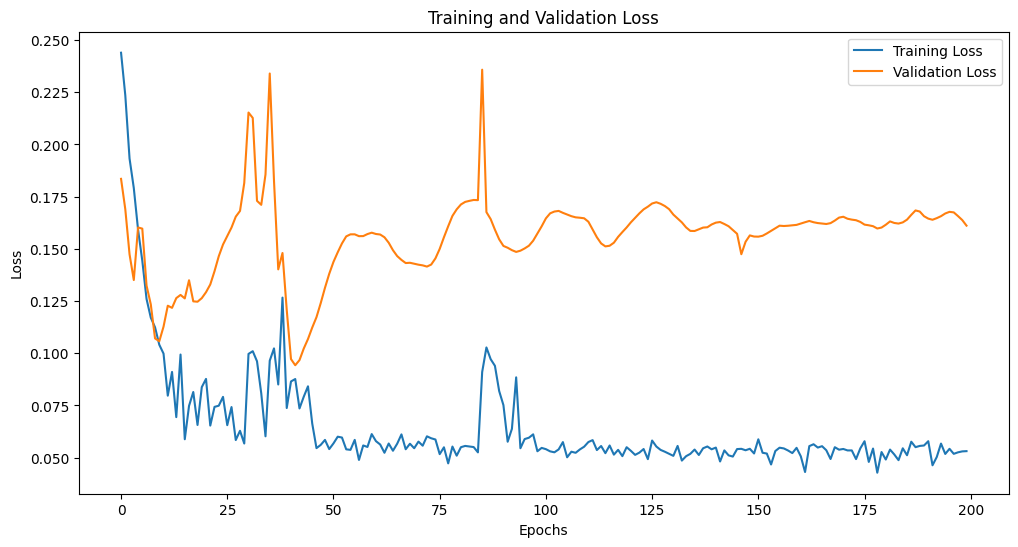

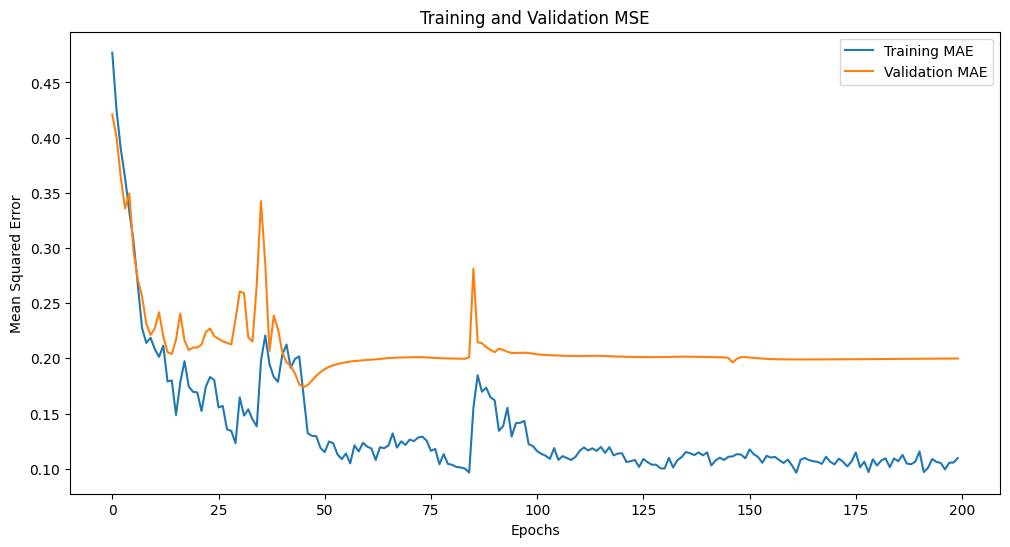

In [4]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation MSE
plt.figure(figsize=(12, 6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [5]:
import pandas as pd
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, confusion_matrix

# Define threshold
threshold = 0.5  # Predictions above this are classified as `correct` (0), below as `incorrect` (1)

# Load the trained model
model = load_model("stage1-final.keras")

# Predict on validation set
y_pred = model.predict(X_val).flatten()  # Flatten the predictions for simplicity

# Apply threshold
# y_classified = [0 if pred > threshold else 1 for pred in y_pred]  # 0 = correct, 1 = incorrect

y_classified = []
for pred in y_pred:
    if pred > threshold:
        y_classified.append(1)  # Correct
    else:
        y_classified.append(0)  # Incorrect
print(y_classified)

# Convert to a DataFrame for easy analysis
results_df = pd.DataFrame({
    'True Label': y_val,
    'Predicted Value': y_pred,
    'Predicted Class': y_classified
})

# Save results to a CSV file for analysis
results_df.to_csv("validation_results.csv", index=False)
print("Validation results saved to 'validation_results.csv'.")

# Display the first few rows
print(results_df.head())

# Calculate and display accuracy
accuracy = accuracy_score(y_val, y_classified)
print(f"Accuracy: {accuracy:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_classified)
print("Confusion Matrix:")
print(conf_matrix)


1/1 [==============================] - 1s 1s/step
[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1]
Validation results saved to 'validation_results.csv'.
   True Label  Predicted Value  Predicted Class
0           0         0.000654                0
1           0         0.001352                0
2           0         0.000891                0
3           0         0.836519                1
4           0         0.000870                0
Accuracy: 0.80
Confusion Matrix:
[[9 2]
 [1 3]]


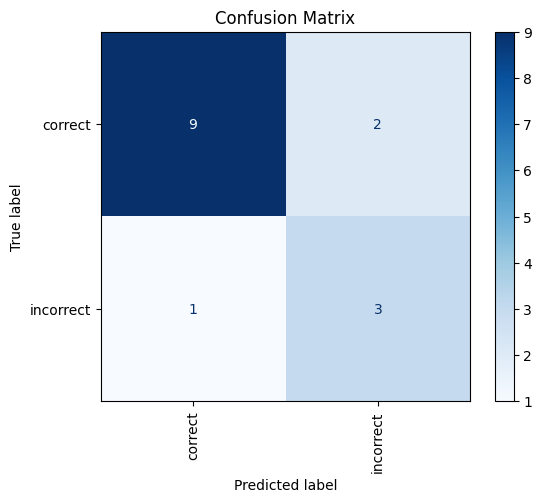

Accuracy: 0.80


In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Define a single threshold for classification
threshold = 0.5  # Adjust this value to experiment with different thresholds

# Classify predictions based on the threshold
# y_classified = [0 if pred > threshold else 1 for pred in y_pred]  # `0` = correct, `1` = incorrect

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, labels):
    # Ensure label order matches the data
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # Numerical order: 0 = correct, 1 = incorrect
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues', xticks_rotation='vertical')
    plt.title('Confusion Matrix')
    plt.grid(False)
    plt.show()

# Ensure the order of labels matches the confusion matrix
true_labels = ["correct", "incorrect"]  # Match this to 0 = correct, 1 = incorrect

# Plot confusion matrix
plot_confusion_matrix(y_val, y_classified, labels=true_labels)

# Calculate and print accuracy
accuracy = accuracy_score(y_val, y_classified)
print(f"Accuracy: {accuracy:.2f}")


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="API_KEY")
project = rf.workspace().project("MODEL_ENDPOINT")
model = project.version(VERSION).model

# infer on a local image
print(model.predict("your_image.jpg", confidence=40, overlap=30).json())

In [2]:
import cv2
from roboflow import Roboflow

# Initialize Roboflow model
rf = Roboflow(api_key="DfuIlxEEqVCA83ErZ3f5")  # Replace with your actual API key
project = rf.workspace().project("runner-receiver")  # Replace with your model endpoint
model = project.version(1).model  # Replace with your model version

# Paths
input_video_path = "stage1/user1.mp4"  # Path to your input video
output_video_path = "output_video.mp4"  # Path to save output video

# Open the video file
cap = cv2.VideoCapture(input_video_path)

# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Define video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Process each frame
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Save frame to disk temporarily
    temp_frame_path = "temp_frame.jpg"
    cv2.imwrite(temp_frame_path, frame)

    # Run inference on the frame
    result = model.predict(temp_frame_path, confidence=40, overlap=30).json()

    # Draw bounding boxes on the frame
    for detection in result['predictions']:
        x, y, width, height = int(detection['x']), int(detection['y']), int(detection['width']), int(detection['height'])
        class_name = detection['class']

        # Define box color based on class
        color = (0, 255, 0) if class_name == "runner" else (0, 0, 255)

        # Draw bounding box
        cv2.rectangle(frame, (x - width // 2, y - height // 2), (x + width // 2, y + height // 2), color, 2)
        cv2.putText(frame, class_name, (x - width // 2, y - height // 2 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    # Write the processed frame to the output video
    out.write(frame)

# Release resources
cap.release()
out.release()

print(f"Processed video saved as {output_video_path}")


loading Roboflow workspace...
loading Roboflow project...
Processed video saved as output_video.mp4


In [4]:
import os
import cv2
import mediapipe as mp
import numpy as np
import json
from roboflow import Roboflow

# Initialize Roboflow model
rf = Roboflow(api_key="DfuIlxEEqVCA83ErZ3f5")  # Replace with your actual API key
project = rf.workspace().project("runner-receiver")  # Replace with your model endpoint
model = project.version(1).model  # Replace with your model version

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

def calculate_angle(a, b, c):
    """Calculate the angle formed by three points a, b, c (b is the vertex)."""
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

def extract_receiver_keypoints(video_path, output_json_path):
    cap = cv2.VideoCapture(video_path)
    keypoints_list = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Save frame temporarily
        temp_frame_path = "temp_frame.jpg"
        cv2.imwrite(temp_frame_path, frame)

        # Run YOLO inference
        result = model.predict(temp_frame_path, confidence=40, overlap=30).json()

        # Identify receiver and extract keypoints
        for detection in result['predictions']:
            if detection['class'] == "receiver":
                x, y, width, height = int(detection['x']), int(detection['y']), int(detection['width']), int(detection['height'])
                roi = frame[y - height // 2:y + height // 2, x - width // 2:x + width // 2]

                # Convert ROI to RGB and process with MediaPipe
                roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
                results = pose.process(roi_rgb)

                if results.pose_landmarks:
                    landmarks = results.pose_landmarks.landmark

                    # Extract relevant keypoints
                    nose = [landmarks[mp_pose.PoseLandmark.NOSE].x, landmarks[mp_pose.PoseLandmark.NOSE].y]
                    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y]
                    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y]
                    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y]
                    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y]

                    # Calculate angles
                    head_angle = calculate_angle(left_shoulder, nose, right_shoulder)
                    hip_movement = right_hip[0] - left_hip[0]

                    keypoints_list.append({
                        "head_angle": head_angle,
                        "hip_movement": hip_movement,
                        "nose_x": nose[0],
                        "nose_y": nose[1],
                    })
    
    cap.release()

    # Save extracted features to JSON
    with open(output_json_path, "w") as f:
        json.dump(keypoints_list, f, indent=4)

    print(f"Keypoint extraction completed. Data saved to {output_json_path}")

# Paths
video_path = "stage1/user1.mp4"
output_json_path = "stage1-yolo-keypoints/user1_keypoints.json"

# Process video and save keypoints
extract_receiver_keypoints(video_path, output_json_path)


loading Roboflow workspace...
loading Roboflow project...
Keypoint extraction completed. Data saved to stage1-yolo-keypoints/user1_keypoints.json


In [5]:
import os
import cv2
import mediapipe as mp
import numpy as np
import json
from roboflow import Roboflow

# Initialize Roboflow model
rf = Roboflow(api_key="DfuIlxEEqVCA83ErZ3f5")  # Replace with your actual API key
project = rf.workspace().project("runner-receiver")  # Replace with your model endpoint
model = project.version(1).model  # Replace with your model version

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

def calculate_angle(a, b, c):
    """Calculate the angle formed by three points a, b, c (b is the vertex)."""
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

def extract_receiver_keypoints(input_videos_path, output_json_path):
    os.makedirs(output_json_path, exist_ok=True)
    
    for file in os.listdir(input_videos_path):
        if file.endswith(".mp4"):
            video_file_path = os.path.join(input_videos_path, file)
            cap = cv2.VideoCapture(video_file_path)

            keypoints_list = []

            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                # Save frame temporarily
                temp_frame_path = "temp_frame.jpg"
                cv2.imwrite(temp_frame_path, frame)

                # Run YOLO inference
                result = model.predict(temp_frame_path, confidence=40, overlap=30).json()

                # Identify receiver and extract keypoints
                for detection in result['predictions']:
                    if detection['class'] == "receiver":
                        x, y, width, height = int(detection['x']), int(detection['y']), int(detection['width']), int(detection['height'])
                        roi = frame[y - height // 2:y + height // 2, x - width // 2:x + width // 2]

                        # Convert ROI to RGB and process with MediaPipe
                        roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
                        results = pose.process(roi_rgb)

                        if results.pose_landmarks:
                            landmarks = results.pose_landmarks.landmark

                            # Extract relevant keypoints
                            nose = [landmarks[mp_pose.PoseLandmark.NOSE].x, landmarks[mp_pose.PoseLandmark.NOSE].y]
                            left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y]
                            right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y]
                            left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y]
                            right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y]

                            # Calculate angles
                            head_angle = calculate_angle(left_shoulder, nose, right_shoulder)
                            hip_movement = right_hip[0] - left_hip[0]

                            keypoints_list.append({
                                "head_angle": head_angle,
                                "hip_movement": hip_movement,
                                "nose_x": nose[0],
                                "nose_y": nose[1],
                            })

            cap.release()

            # Save extracted features to JSON
            json_filename = os.path.splitext(file)[0] + "_keypoints.json"
            json_file_path = os.path.join(output_json_path, json_filename)
            with open(json_file_path, "w") as f:
                json.dump(keypoints_list, f, indent=4)

            print(f"Processed: {file} - Keypoints saved to {json_file_path}")

    print("All video processing completed. Keypoints saved as JSON.")

# Paths
input_videos_path = "stage1-dataset"
output_json_path = "stage1-yolo-keypoints"

# Process all videos and save keypoints
extract_receiver_keypoints(input_videos_path, output_json_path)


loading Roboflow workspace...
loading Roboflow project...
Processed: user12_brightness.mp4 - Keypoints saved to stage1-yolo-keypoints\user12_brightness_keypoints.json


KeyboardInterrupt: 

In [6]:
from roboflow import Roboflow
rf = Roboflow(api_key="DfuIlxEEqVCA83ErZ3f5")
project = rf.workspace().project("runner-receiver")
version = project.version(1)
version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to runner-receiver-1 in yolov8:: 100%|██████████| 13715/13715 [00:04<00:00, 2982.04it/s]


In [7]:
download_location = version.download("yolov11", location="my_model/")
print(f"Model downloaded to: {download_location}")

Exporting format yolov11 in progress : 85.0%
Version export complete for yolov11 format



Extracting Dataset Version Zip to my_model/ in yolov11:: 100%|██████████| 13715/13715 [00:03<00:00, 3618.35it/s]

Model downloaded to: <roboflow.core.dataset.Dataset object at 0x000002626D76C610>


In [2]:
# Import the InferencePipeline object
from inference import InferencePipeline
import cv2

def my_sink(result, video_frame):
    if result.get("output_image"): # Display an image from the workflow response
        cv2.imshow("Workflow Image", result["output_image"].numpy_image)
        cv2.waitKey(1)
    print(result) # do something with the predictions of each frame
    

# initialize a pipeline object
pipeline = InferencePipeline.init_with_workflow(
    api_key="DfuIlxEEqVCA83ErZ3f5",
    workspace_name="relayrace",
    workflow_id="custom-workflow-4",
    video_reference=r'D:\Downloads\Howest\Semester 3\Team Project\nekit_preprocessing_sports\relay_race\train\stage1\user1.mp4', # Path to video, device id (int, usually 0 for built in webcams), or RTSP stream url
    max_fps=30,
    on_prediction=my_sink
)
pipeline.start() #start the pipeline
pipeline.join() #wait for the pipeline thread to finish


{'predictions': Detections(xyxy=array([[ 657.,  443.,  891.,  780.],
       [1330.,  431., 1513.,  697.]]), mask=None, confidence=array([0.96821469, 0.96267366]), class_id=array([0, 1]), tracker_id=None, data={'class_name': array(['receiver', 'runner'], dtype='<U8'), 'detection_id': array(['d0e0f485-ecef-4559-ae43-36beb0ef1aca',
       'f1616f25-419f-43da-878e-a7c6a190d2e3'], dtype='<U36'), 'parent_id': array(['image.[0]', 'image.[0]'], dtype='<U9'), 'image_dimensions': array([[1080, 1920],
       [1080, 1920]]), 'inference_id': array(['b88cdcfb-5f57-491d-97d2-7aeee477c29a',
       'b88cdcfb-5f57-491d-97d2-7aeee477c29a'], dtype='<U36'), 'prediction_type': array(['object-detection', 'object-detection'], dtype='<U16'), 'root_parent_id': array(['image.[0]', 'image.[0]'], dtype='<U9'), 'root_parent_coordinates': array([[0, 0],
       [0, 0]]), 'root_parent_dimensions': array([[1080, 1920],
       [1080, 1920]]), 'parent_coordinates': array([[0, 0],
       [0, 0]]), 'parent_dimensions': arr

KeyboardInterrupt: 

In [ ]:
import os
import cv2
import mediapipe as mp
import numpy as np
import json
from inference import InferencePipeline

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.5, min_tracking_confidence=0.5)

def calculate_angle(a, b, c):
    """Calculate the angle formed by three points a, b, c (b is the vertex)."""
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

def extract_receiver_keypoints(result, video_frame):
    keypoints_list = []
    for detection in result['predictions']:
        if detection.data['class_name'][0] == "receiver":
            x1, y1, x2, y2 = map(int, detection.xyxy[0])
            roi = video_frame[y1:y2, x1:x2]
            roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)
            results = pose.process(roi_rgb)

            if results.pose_landmarks:
                landmarks = results.pose_landmarks.landmark
                nose = [landmarks[mp_pose.PoseLandmark.NOSE].x, landmarks[mp_pose.PoseLandmark.NOSE].y]
                left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y]
                right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y]
                left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y]
                right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y]

                head_angle = calculate_angle(left_shoulder, nose, right_shoulder)
                hip_movement = right_hip[0] - left_hip[0]

                keypoints_list.append({
                    "head_angle": head_angle,
                    "hip_movement": hip_movement,
                    "nose_x": nose[0],
                    "nose_y": nose[1],
                })
    return keypoints_list

def my_sink(result, video_frame):
    keypoints = extract_receiver_keypoints(result, video_frame)
    with open("receiver_keypoints.json", "a") as f:
        json.dump(keypoints, f, indent=4)
        f.write("\n")
    print("Keypoints saved.")

# Initialize and start the inference pipeline
pipeline = InferencePipeline.init_with_workflow(
    api_key="DfuIlxEEqVCA83ErZ3f5",
    workspace_name="relayrace",
    workflow_id="custom-workflow-4",
    video_reference=r'D:\Downloads\Howest\Semester 3\Team Project\nekit_preprocessing_sports\relay_race\train\stage1\user1.mp4',
    max_fps=30,
    on_prediction=my_sink
)
pipeline.start()
pipeline.join()

print("All video processing completed. Keypoints saved as JSON.")


In [3]:
import os
import cv2
import mediapipe as mp
import numpy as np
import json
from inference import InferencePipeline
from PIL import Image

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.1, min_tracking_confidence=0.1)

def calculate_angle(a, b, c):
    """Calculate the angle formed by three points a, b, c (b is the vertex)."""
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

def extract_receiver_keypoints(result, video_frame):
    keypoints_list = []
    try:
        if hasattr(video_frame, "image"):
            video_frame_np = np.array(video_frame.image)
        else:
            print("Error: video_frame does not have an image attribute")
            return keypoints_list

        video_frame_np = cv2.cvtColor(video_frame_np, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    except Exception as e:
        print(f"Error converting video frame: {e}")
        return keypoints_list

    predictions = result.get('predictions')
    if not predictions:
        print("No predictions found in result.")
        return keypoints_list

    for i in range(len(predictions.xyxy)):
        try:
            class_name = predictions.data['class_name'][i]
            print("Class Name:", class_name)

            if class_name == "receiver":
                x1, y1, x2, y2 = map(int, predictions.xyxy[i])
                print(f"Bounding box coordinates: {x1, y1, x2, y2}")

                # Increase padding to capture full body
                padding = 50  
                x1 = max(0, x1 - padding)
                y1 = max(0, y1 - padding)
                x2 = min(video_frame_np.shape[1], x2 + padding)
                y2 = min(video_frame_np.shape[0], y2 + padding)

                roi = video_frame_np[y1:y2, x1:x2]

                # Save for debugging
                cv2.imwrite(f"debug_roi_{x1}_{y1}.jpg", roi)
                print(f"ROI saved for debugging at debug_roi_{x1}_{y1}.jpg")

                if roi.size == 0:
                    print("Empty ROI extracted, skipping.")
                    continue

                roi_resized = cv2.resize(roi, (256, 256))
                roi_rgb = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB)
                results = pose.process(roi_rgb)

                if results.pose_landmarks:
                    landmarks = results.pose_landmarks.landmark
                    nose = [landmarks[mp_pose.PoseLandmark.NOSE].x, landmarks[mp_pose.PoseLandmark.NOSE].y]
                    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y]
                    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y]
                    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y]
                    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y]

                    head_angle = calculate_angle(left_shoulder, nose, right_shoulder)
                    hip_movement = right_hip[0] - left_hip[0]

                    keypoints_list.append({
                        "head_angle": head_angle,
                        "hip_movement": hip_movement,
                        "nose_x": nose[0],
                        "nose_y": nose[1],
                    })
                else:
                    print("No pose landmarks detected. Try adjusting ROI or confidence threshold.")
        except Exception as e:
            print(f"Error processing detection: {e}")

    return keypoints_list






def my_sink(result, video_frame, output_json_path, video_name):
    keypoints = extract_receiver_keypoints(result, video_frame)
    if keypoints:
        json_file_path = os.path.join(output_json_path, f"{video_name}_keypoints.json")

        # Load existing data if the file exists
        if os.path.exists(json_file_path):
            with open(json_file_path, "r") as f:
                existing_data = json.load(f)
        else:
            existing_data = []

        # Append new keypoints to the existing list
        existing_data.extend(keypoints)

        # Write updated data back to the file
        with open(json_file_path, "w") as f:
            json.dump(existing_data, f, indent=4)
        
        print(f"Keypoints saved for {video_name}")
    else:
        print(f"No keypoints extracted for {video_name}")


def process_videos(input_videos_path, output_json_path):
    os.makedirs(output_json_path, exist_ok=True)
    for file in os.listdir(input_videos_path):
        if file.endswith(".mp4"):
            video_path = os.path.join(input_videos_path, file)
            video_name = os.path.splitext(file)[0]  # Extract video name without extension
            
            pipeline = InferencePipeline.init_with_workflow(
                api_key="DfuIlxEEqVCA83ErZ3f5",
                workspace_name="relayrace",
                workflow_id="custom-workflow-4",
                video_reference=video_path,
                max_fps=30,
                on_prediction=lambda result, video_frame: my_sink(result, video_frame, output_json_path, video_name)
            )
            
            pipeline.start()
            pipeline.join()

input_videos_path = r"D:\Downloads\Howest\Semester 3\Team Project\nekit_preprocessing_sports\relay_race\train\stage1-dataset"
output_json_path = r"D:\Downloads\Howest\Semester 3\Team Project\nekit_preprocessing_sports\relay_race\train\stage1-yolo-keypoints"

# Process all videos and save keypoints
process_videos(input_videos_path, output_json_path)

print("All video processing completed. Keypoints saved as JSON.")


Class Name: receiver
Bounding box coordinates: (86, 468, 147, 672)
ROI saved for debugging at debug_roi_36_418.jpg
Keypoints saved for user12_brightness
Class Name: receiver
Bounding box coordinates: (86, 468, 147, 672)
ROI saved for debugging at debug_roi_36_418.jpg
Keypoints saved for user12_brightness
Class Name: receiver
Bounding box coordinates: (86, 467, 148, 672)
ROI saved for debugging at debug_roi_36_417.jpg
Keypoints saved for user12_brightness
Class Name: receiver
Bounding box coordinates: (86, 467, 148, 672)
ROI saved for debugging at debug_roi_36_417.jpg
Keypoints saved for user12_brightness
Class Name: receiver
Bounding box coordinates: (86, 466, 148, 672)
ROI saved for debugging at debug_roi_36_416.jpg
Keypoints saved for user12_brightness


KeyboardInterrupt: 

In [2]:
import os
import cv2
import mediapipe as mp
import numpy as np
import json
from inference import InferencePipeline
from PIL import Image

# Initialize MediaPipe Pose model
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=False, min_detection_confidence=0.3, min_tracking_confidence=0.3)

def calculate_angle(a, b, c):
    """Calculate the angle formed by three points a, b, c (b is the vertex)."""
    a, b, c = np.array(a), np.array(b), np.array(c)
    ba, bc = a - b, c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
    return np.degrees(angle)

def extract_receiver_keypoints(result, video_frame, frame_number):
    keypoints_list = []
    try:
        if hasattr(video_frame, "image"):
            video_frame_np = np.array(video_frame.image)
        else:
            # print("Error: video_frame does not have an image attribute")
            return keypoints_list

        video_frame_np = cv2.cvtColor(video_frame_np, cv2.COLOR_RGB2BGR)  # Convert RGB to BGR for OpenCV
    except Exception as e:
      #   print(f"Error converting video frame: {e}")
        return keypoints_list

    predictions = result.get('predictions')
    if not predictions:
      #   print("No predictions found in result.")
        return keypoints_list

    for i in range(len(predictions.xyxy)):
        try:
            class_name = predictions.data['class_name'][i]
            # print("Class Name:", class_name)

            if class_name == "receiver":
                x1, y1, x2, y2 = map(int, predictions.xyxy[i])
               #  print(f"Bounding box coordinates: {x1, y1, x2, y2}")

                # Increase padding to capture full body
                padding = 50  
                x1 = max(0, x1 - padding)
                y1 = max(0, y1 - padding)
                x2 = min(video_frame_np.shape[1], x2 + padding)
                y2 = min(video_frame_np.shape[0], y2 + padding)

                roi = video_frame_np[y1:y2, x1:x2]

                if roi.size == 0:
                  #   print("Empty ROI extracted, skipping.")
                    continue

                roi_resized = cv2.resize(roi, (256, 256))
                roi_rgb = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2RGB)
                results = pose.process(roi_rgb)

                if results.pose_landmarks:
                    landmarks = results.pose_landmarks.landmark
                    nose = [landmarks[mp_pose.PoseLandmark.NOSE].x, landmarks[mp_pose.PoseLandmark.NOSE].y]
                    left_shoulder = [landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER].y]
                    right_shoulder = [landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].x, landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER].y]
                    left_hip = [landmarks[mp_pose.PoseLandmark.LEFT_HIP].x, landmarks[mp_pose.PoseLandmark.LEFT_HIP].y]
                    right_hip = [landmarks[mp_pose.PoseLandmark.RIGHT_HIP].x, landmarks[mp_pose.PoseLandmark.RIGHT_HIP].y]

                    head_angle = calculate_angle(left_shoulder, nose, right_shoulder)
                    hip_movement = right_hip[0] - left_hip[0]

                    keypoints_list.append({
                        "frame": frame_number,
                        "head_angle": head_angle,
                        "hip_movement": hip_movement,
                        "nose_x": nose[0],
                        "nose_y": nose[1],
                    })
               #  else:
               #      print("No pose landmarks detected. Try adjusting ROI or confidence threshold.")
        except Exception as e:
            print(f"Error processing detection: {e}")

    return keypoints_list

def my_sink(result, video_frame, output_json_path, video_name, frame_number):
    keypoints = extract_receiver_keypoints(result, video_frame, frame_number)
    json_file_path = os.path.join(output_json_path, f"{video_name}_keypoints.json")

    # Load existing data if the file exists
    if os.path.exists(json_file_path):
        with open(json_file_path, "r") as f:
            existing_data = json.load(f)
    else:
        existing_data = []

    # If no keypoints, add an empty object with the frame number
    if not keypoints:
        existing_data.append({"frame": frame_number})
      #   print(f"No keypoints extracted for frame {frame_number}")
    else:
        existing_data.extend(keypoints)

    # Write updated data back to the file
    with open(json_file_path, "w") as f:
        json.dump(existing_data, f, indent=4)
    
   #  print(f"Keypoints saved for {video_name} - Frame {frame_number}")


def process_videos(input_videos_path, output_json_path):
    os.makedirs(output_json_path, exist_ok=True)
    for file in os.listdir(input_videos_path):
        if file.endswith(".mp4"):
            video_path = os.path.join(input_videos_path, file)
            video_name = os.path.splitext(file)[0]  # Extract video name without extension
            
            cap = cv2.VideoCapture(video_path)
            frame_number = 0

            def on_prediction_callback(result, video_frame):
                nonlocal frame_number
                frame_number += 1
                my_sink(result, video_frame, output_json_path, video_name, frame_number)

            pipeline = InferencePipeline.init_with_workflow(
                api_key="DfuIlxEEqVCA83ErZ3f5",
                workspace_name="relayrace",
                workflow_id="custom-workflow-4",
                video_reference=video_path,
                max_fps=30,
                on_prediction=on_prediction_callback
            )
            
            pipeline.start()
            pipeline.join()

input_videos_path = r"D:\Downloads\Howest\Semester 3\Team Project\nekit_preprocessing_sports\relay_race\train\stage1-dataset"
output_json_path = r"D:\Downloads\Howest\Semester 3\Team Project\nekit_preprocessing_sports\relay_race\train\stage1-yolo-keypoints"

# Process all videos and save keypoints
process_videos(input_videos_path, output_json_path)

print("All video processing completed. Keypoints saved as JSON.")


All video processing completed. Keypoints saved as JSON.
